# SMP - MONTVU

In [8]:
import pandas as pd

In [20]:
from os.path import join

DATADIR = 'data'
FILENAME = 'smp-montvu.csv'

datapath = join(DATADIR, FILENAME)

In [21]:
df = pd.read_csv(datapath, sep=';')

In [10]:
# Keep columns and rename
df = df[['Fecha y hora', 'Zona', 'Fin']]
df.rename(columns={'Fecha y hora':'start', 'Zona':'zone', 'Fin':'end'}, inplace=True)

In [11]:
# Get zones
df['zone'] = df.zone.str[-3:]

In [12]:
# Set datetime
df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)
df['duration'] = df.end - df.start

In [14]:
# Filter at least 1 minute of duration
df = df[df.duration > pd.Timedelta(1,'m')]

In [15]:
df.sort_values(by='duration', ascending=False)

,start,zone,end,duration
2516,2020-11-26 06:35:00,137,2020-11-26 14:48:00,08:13:00
6634,2020-02-25 06:05:00,126,2020-02-25 14:18:00,08:13:00
7344,2020-08-01 06:05:00,110,2020-08-01 14:18:00,08:13:00
6635,2020-02-25 06:05:00,138,2020-02-25 14:18:00,08:13:00
6637,2020-02-24 06:06:00,126,2020-02-24 14:18:00,08:12:00
...,...,...,...,...
5768,2020-02-07 10:45:00,102,2020-02-07 10:47:00,00:02:00
5776,2020-02-07 08:52:00,105,2020-02-07 08:54:00,00:02:00
5781,2020-02-07 08:14:00,111,2020-02-07 08:16:00,00:02:00
3033,2020-12-11 13:52:00,130,2020-12-11 13:54:00,00:02:00


In [18]:
df['dpto'] = 'MONT'

In [19]:
df[['dpto','zone', 'start', 'end']].to_csv('smp-montvu-pp.csv')

In [163]:
df['duration'].astype('timedelta64[m]').plot.hist()

AttributeError: 'Series' object has no attribute 'boxplot'

In [171]:
min(df.duration)

Timedelta('0 days 00:02:00')

In [ ]:
df['duration'].astype('timedelta64[m]').plot.hist

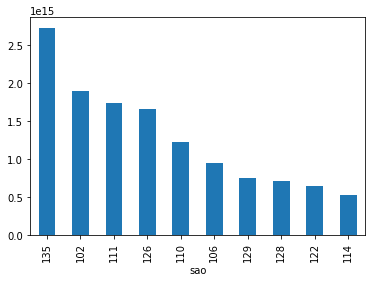

In [124]:
df.groupby('sao').sum()['duration'].nlargest(10).plot(kind='bar')

In [126]:
df = df[['sao','start','end','duration']]

In [129]:
df = df[df['start']>='2020-01-01']

In [130]:
df = df[df['start']<'2021-01-01']

In [148]:
df.set_index('start', inplace=True)

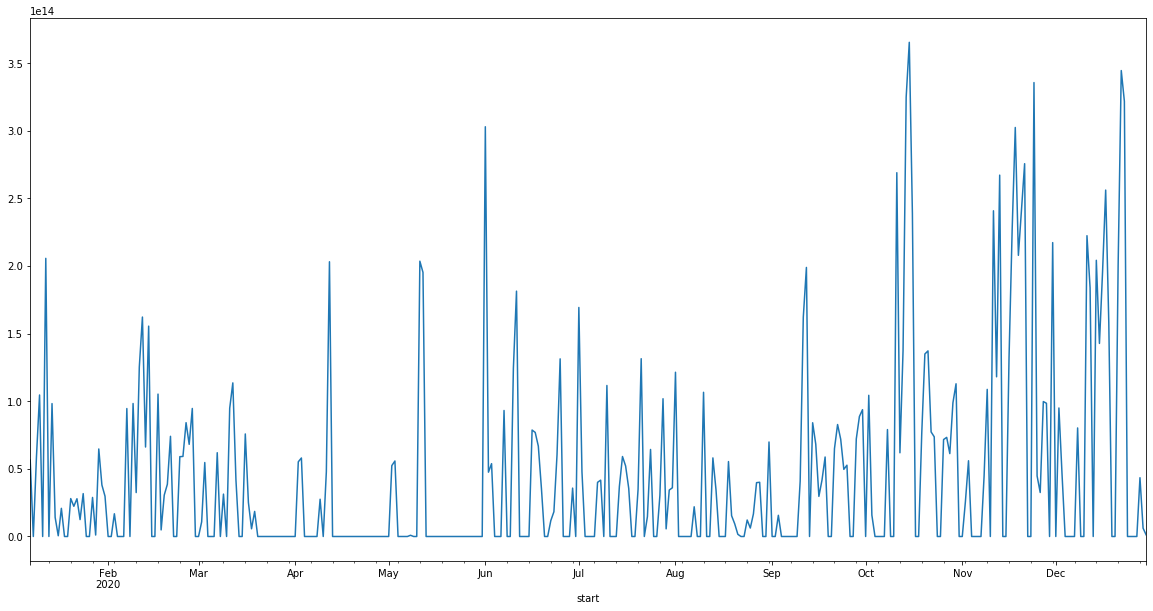

In [161]:
df['duration'].resample('1D').sum().plot(figsize=(20,10))